In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import io
import math
import pandas as pd
import mplhep as hep

hep.style.use("ALICE")

In [48]:
def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

In [52]:
df_sig_jpsi_vs_rap = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/sig_Jpsi_vs_rap_10_50.txt', sep=' ')
rap_min = df_sig_jpsi_vs_rap["x_min"]
rap_max = df_sig_jpsi_vs_rap["x_max"]
rap = (rap_min + rap_max) / 2.
err_rap = (rap_max - rap_min) / 2.
sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["val"]
stat_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["stat"]
syst_sig_jpsi_vs_rap = df_sig_jpsi_vs_rap["syst"]

df_v2_jpsi_vs_pt_10_50_rebin = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_rebin.txt', sep=' ')
pt_min_rebin = df_v2_jpsi_vs_pt_10_50_rebin["x_min"]
pt_max_rebin = df_v2_jpsi_vs_pt_10_50_rebin["x_max"]
pt_rebin = (pt_min_rebin + pt_max_rebin) / 2.
err_pt_rebin = (pt_max_rebin - pt_min_rebin) / 2.
v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["val"]
stat_v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["stat"]
syst_v2_jpsi_vs_pt_10_50_rebin = df_v2_jpsi_vs_pt_10_50_rebin["syst"]

df_v2_jpsi_vs_pt_10_50_preview = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_preview.txt', sep=' ')
pt_min_preview = df_v2_jpsi_vs_pt_10_50_preview["x_min"]
pt_max_preview = df_v2_jpsi_vs_pt_10_50_preview["x_max"]
pt_preview = (pt_min_preview + pt_max_preview) / 2.
err_pt_preview = (pt_max_preview - pt_min_preview) / 2.
v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["val"]
stat_v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["stat"]
syst_v2_jpsi_vs_pt_10_50_preview = df_v2_jpsi_vs_pt_10_50_preview["syst"]

df_v2_jpsi_vs_pt_10_50_final = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50_final.txt', sep=' ')
pt_min_final = df_v2_jpsi_vs_pt_10_50_final["x_min"]
pt_max_final = df_v2_jpsi_vs_pt_10_50_final["x_max"]
pt_final = (pt_min_final + pt_max_final) / 2.
err_pt_final = (pt_max_final - pt_min_final) / 2.
v2_jpsi_vs_pt_10_50_final = df_v2_jpsi_vs_pt_10_50_final["val"]
stat_v2_jpsi_vs_pt_10_50_final = df_v2_jpsi_vs_pt_10_50_final["stat"]
syst_v2_jpsi_vs_pt_10_50_final = df_v2_jpsi_vs_pt_10_50_final["syst"]

df_v2_jpsi_vs_pt_10_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/v2_vs_pt_10_50.txt', sep=' ')
pt_min = df_v2_jpsi_vs_pt_10_50["x_min"]
pt_max = df_v2_jpsi_vs_pt_10_50["x_max"]
pt = (pt_min + pt_max) / 2.
err_pt = (pt_max - pt_min) / 2.
v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["val"]
stat_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["stat"]
syst_v2_jpsi_vs_pt_10_50 = df_v2_jpsi_vs_pt_10_50["syst"]

df_v2_jpsi_run2_vs_pt_10_30 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_10_30.txt', sep=' ')
pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["x"]
err_pt_run2 = df_v2_jpsi_run2_vs_pt_10_30["ex"]
v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["val"]
stat_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["stat"]
syst_v2_jpsi_run2_vs_pt_10_30 = df_v2_jpsi_run2_vs_pt_10_30["syst"]

df_v2_jpsi_run2_vs_pt_30_50 = pd.read_csv('/Users/lucamicheletti/GITHUB/jpsi_flow_run3/results/run2_v2_vs_pt_30_50.txt', sep=' ')
v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["val"]
stat_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["stat"]
syst_v2_jpsi_run2_vs_pt_30_50 = df_v2_jpsi_run2_vs_pt_30_50["syst"]

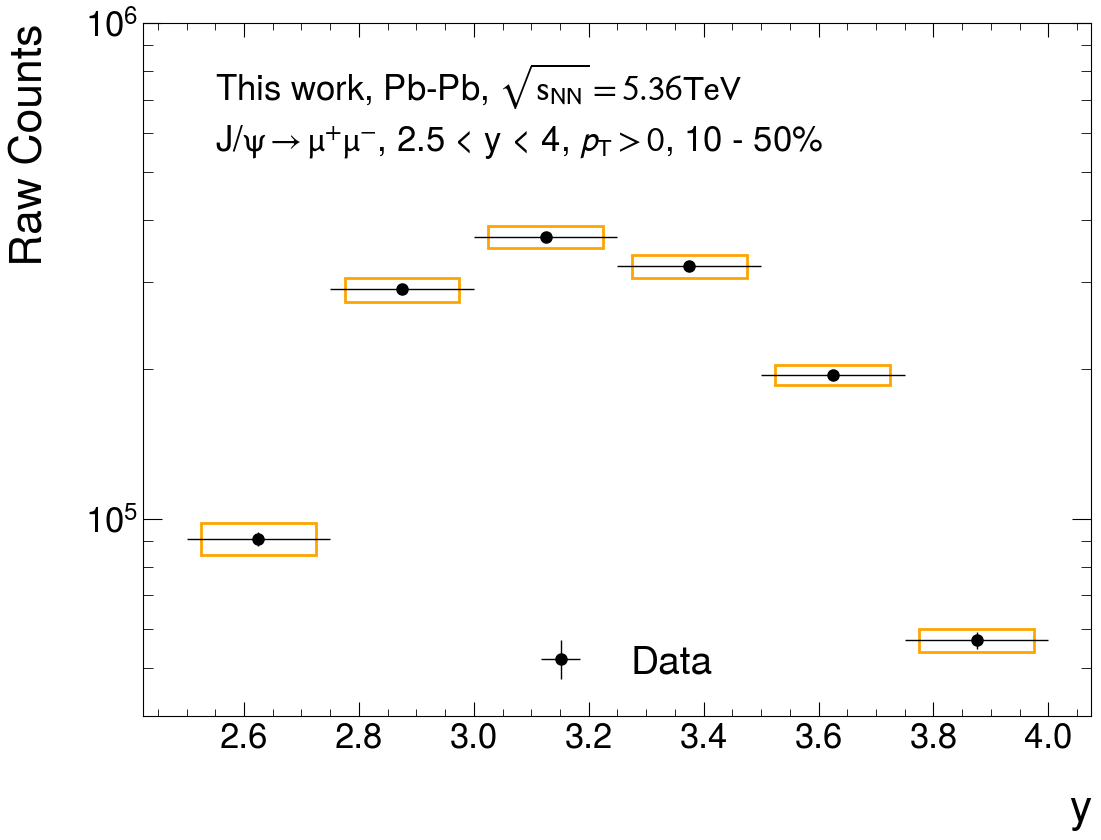

In [53]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(rap, 0.1, sig_jpsi_vs_rap, syst_sig_jpsi_vs_rap, ax, 'orange', 2)

plt.xlabel("y") 
plt.ylabel("Raw Counts") 
plt.yscale('log')
plt.ylim(4e4, 1e6)
plt.errorbar(rap, sig_jpsi_vs_rap, xerr=err_rap, yerr=stat_sig_jpsi_vs_rap, label="Data", fmt='o', color='black', ecolor='black')
#plt.errorbar(rap, sig_jpsi_vs_rap, yerr=syst_sig_jpsi_vs_rap, label="syst. error", fmt='o', color='black', ecolor='orange', alpha=0.5, elinewidth=50, capsize=0)
plt.legend(loc='lower center')
plt.text(2.55, 7e5, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(2.55, 5.5e5, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, $\it{p}_{\rm{T}} > 0$, 10 - 50%', fontsize=25)
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/sig_jpsi_vs_y_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

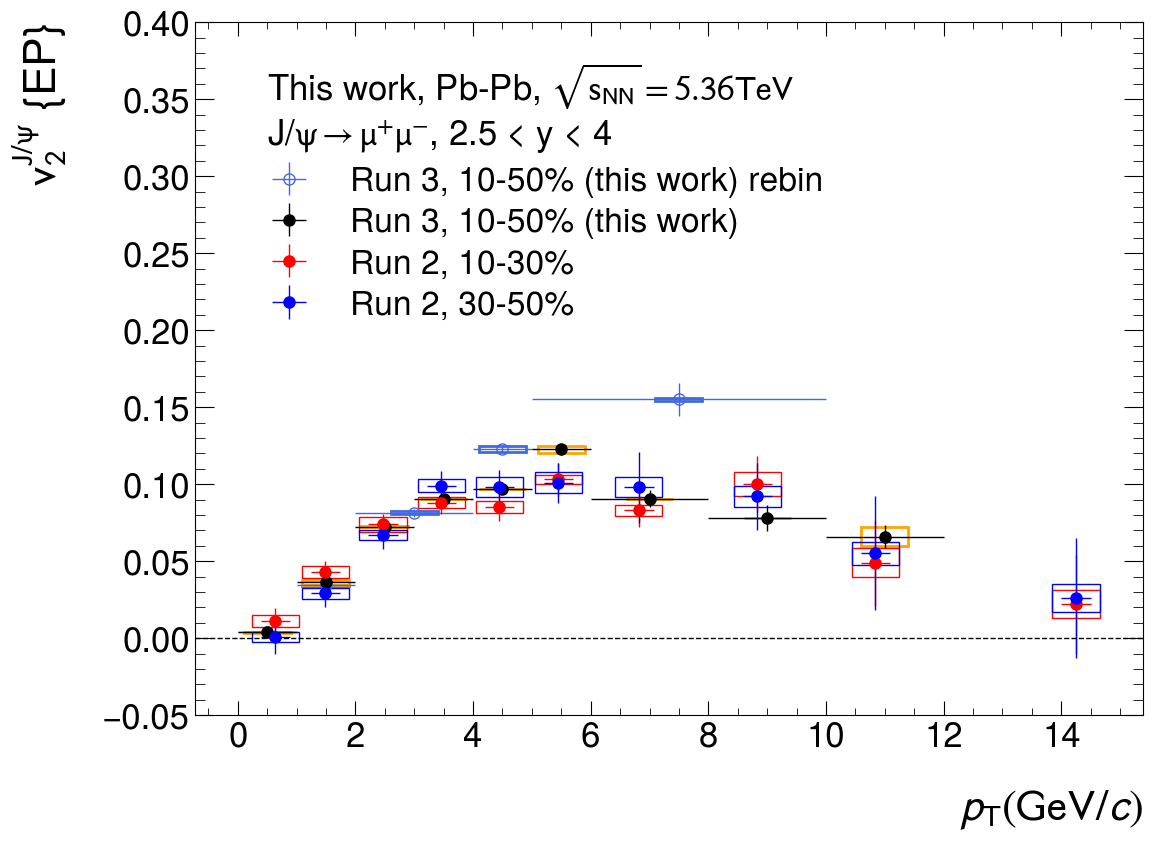

In [54]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt, 0.4, v2_jpsi_vs_pt_10_50, syst_v2_jpsi_vs_pt_10_50, ax, 'royalblue', 2)
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'orange', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'red', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'blue', 1)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.ylim(-0.05, 0.40)
plt.errorbar(pt, v2_jpsi_vs_pt_10_50, xerr=err_pt, yerr=stat_v2_jpsi_vs_pt_10_50, label="Run 3, 10-50% (this work) rebin", fmt='o', color='royalblue', ecolor='royalblue', mfc='none')
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Run 3, 10-50% (this work)", fmt='o', color='black', ecolor='black')
#plt.errorbar(pt, v2_jpsi_vs_pt_10_50, yerr=syst_v2_jpsi_vs_pt_10_50, label="syst. error", fmt='o', color='black', ecolor='red', alpha=0.5, elinewidth=50, capsize=0)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='red', ecolor='red')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='blue', ecolor='blue')
plt.legend(loc=(0.05, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50.pdf", format="pdf", bbox_inches="tight")
plt.show()

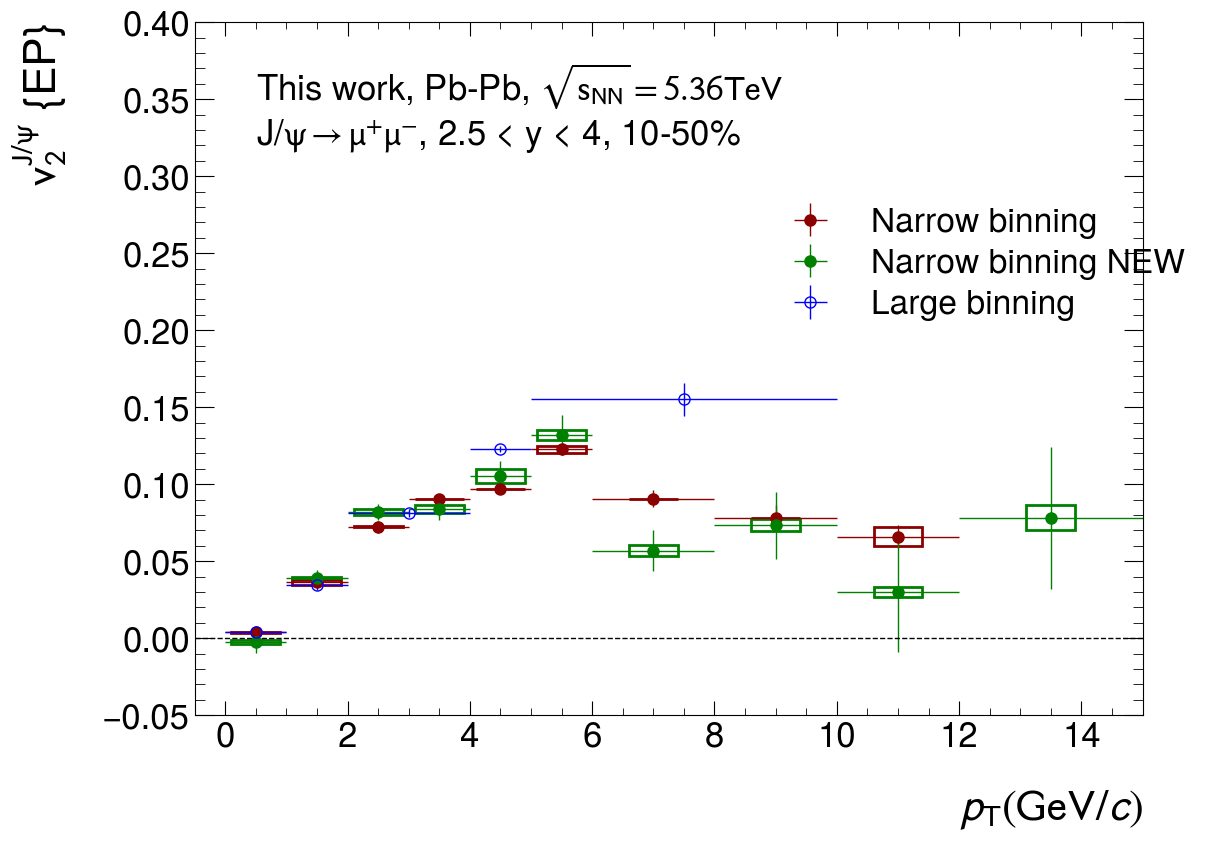

In [56]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'darkred', 2)
plot_syst(pt_final, 0.4, v2_jpsi_vs_pt_10_50_final, syst_v2_jpsi_vs_pt_10_50_final, ax, 'green', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Narrow binning", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt_final, v2_jpsi_vs_pt_10_50_final, xerr=err_pt_final, yerr=stat_v2_jpsi_vs_pt_10_50_final, label="Narrow binning NEW", fmt='o', color='green', ecolor='green')
plt.errorbar(pt, v2_jpsi_vs_pt_10_50, xerr=err_pt, yerr=stat_v2_jpsi_vs_pt_10_50, label="Large binning", fmt='o', color='blue', ecolor='blue', mfc='none')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_different_binnings.pdf", format="pdf", bbox_inches="tight")
plt.show()

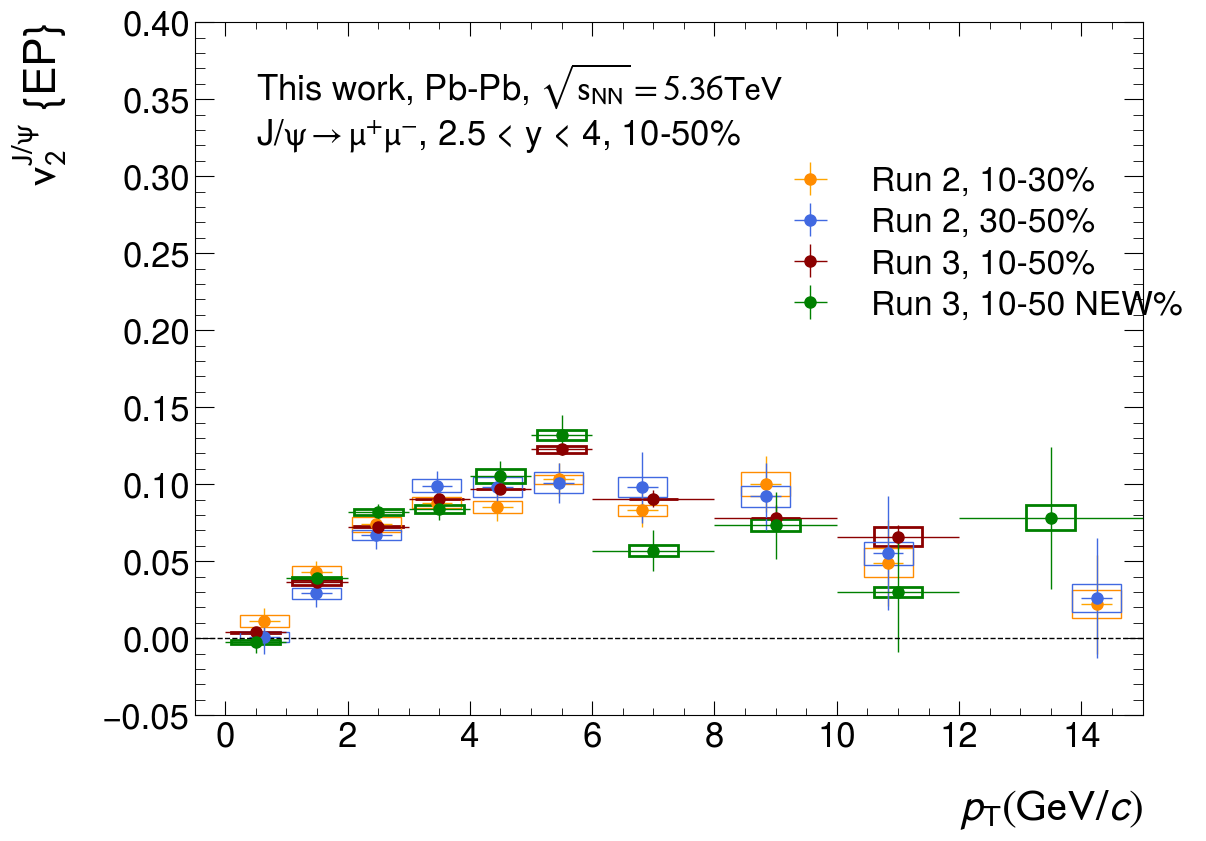

In [51]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_rebin, 0.4, v2_jpsi_vs_pt_10_50_rebin, syst_v2_jpsi_vs_pt_10_50_rebin, ax, 'darkred', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'royalblue', 1)
plot_syst(pt_final, 0.4, v2_jpsi_vs_pt_10_50_final, syst_v2_jpsi_vs_pt_10_50_final, ax, 'green', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(pt_rebin, v2_jpsi_vs_pt_10_50_rebin, xerr=err_pt_rebin, yerr=stat_v2_jpsi_vs_pt_10_50_rebin, label="Run 3, 10-50%", fmt='o', color='darkred', ecolor='darkred')
plt.errorbar(pt_final, v2_jpsi_vs_pt_10_50_final, xerr=err_pt_final, yerr=stat_v2_jpsi_vs_pt_10_50_final, label="Run 3, 10-50 NEW%", fmt='o', color='green', ecolor='green')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()

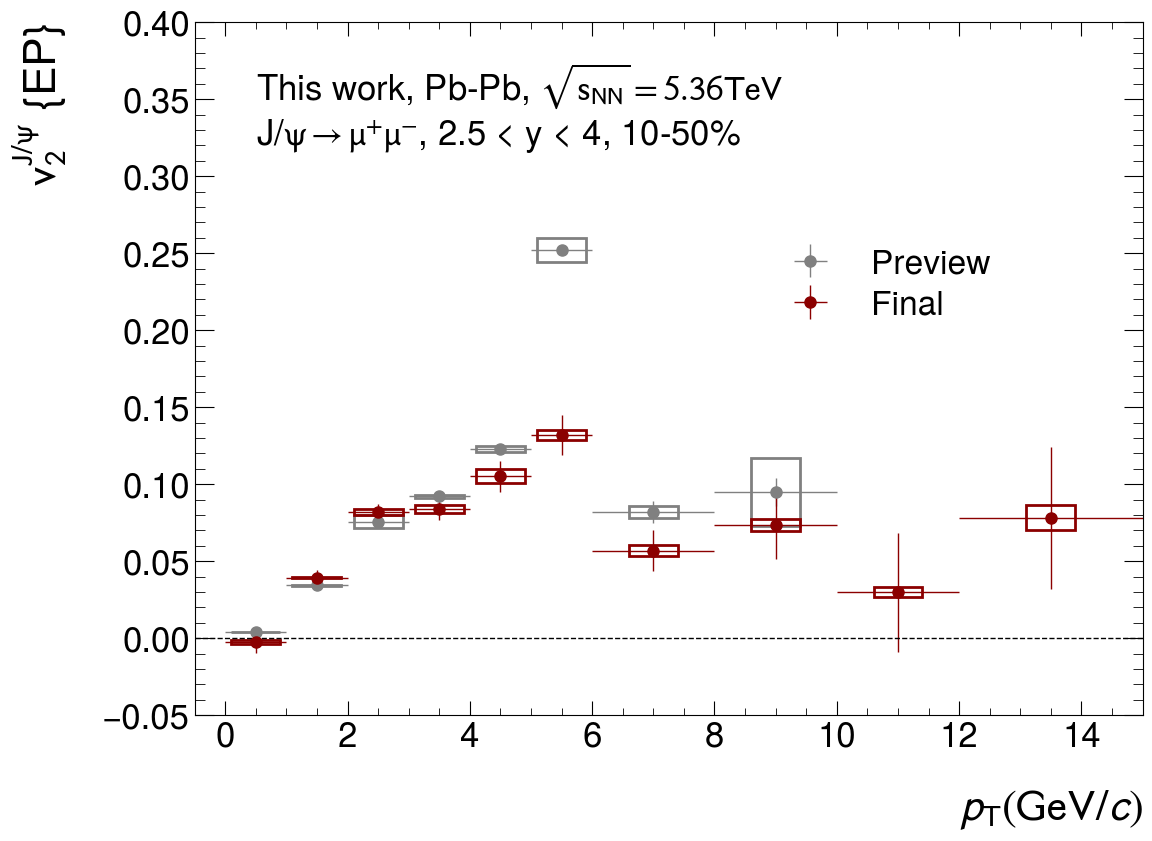

In [61]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_preview, 0.4, v2_jpsi_vs_pt_10_50_preview, syst_v2_jpsi_vs_pt_10_50_preview, ax, 'gray', 2)
plot_syst(pt_final, 0.4, v2_jpsi_vs_pt_10_50_final, syst_v2_jpsi_vs_pt_10_50_final, ax, 'darkred', 2)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_preview, v2_jpsi_vs_pt_10_50_preview, xerr=err_pt_preview, yerr=stat_v2_jpsi_vs_pt_10_50_preview, label="Preview", fmt='o', color='gray', ecolor='gray')
plt.errorbar(pt_final, v2_jpsi_vs_pt_10_50_final, xerr=err_pt_final, yerr=stat_v2_jpsi_vs_pt_10_50_final, label="Final", fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4, 10-50%', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_preview_vs_final_results.pdf", format="pdf", bbox_inches="tight")
plt.show()

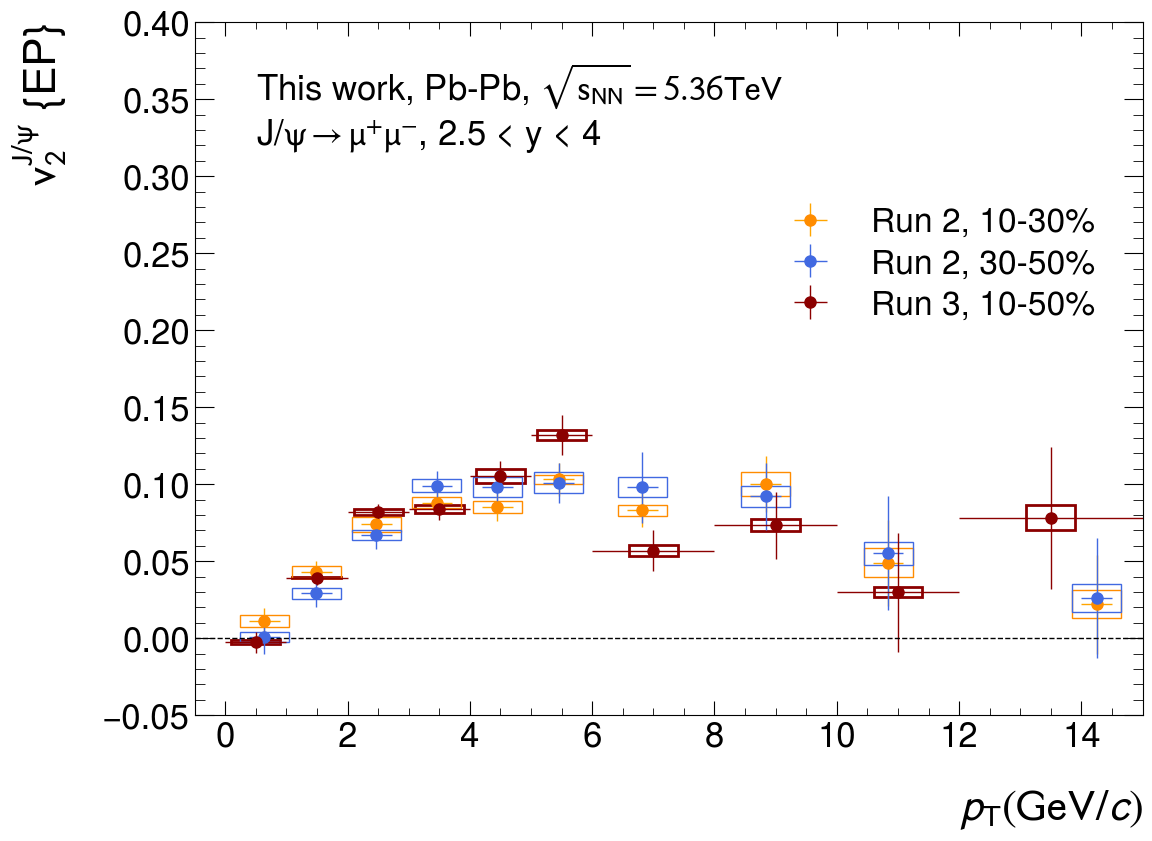

In [63]:
# Creating histogram
fig, ax = plt.subplots()
plot_syst(pt_final, 0.4, v2_jpsi_vs_pt_10_50_final, syst_v2_jpsi_vs_pt_10_50_final, ax, 'darkred', 2)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_10_30, syst_v2_jpsi_run2_vs_pt_10_30, ax, 'darkorange', 1)
plot_syst(pt_run2, 0.4, v2_jpsi_run2_vs_pt_30_50, syst_v2_jpsi_run2_vs_pt_30_50, ax, 'royalblue', 1)

plt.xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$') 
plt.ylabel(r'$v_{2}^{J/\psi}$ {EP}')
plt.xlim(-0.5, 15)
plt.ylim(-0.05, 0.40)
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_10_30, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_10_30, label="Run 2, 10-30%", fmt='o', color='darkorange', ecolor='orange')
plt.errorbar(pt_run2, v2_jpsi_run2_vs_pt_30_50, xerr=err_pt_run2, yerr=stat_v2_jpsi_run2_vs_pt_30_50, label="Run 2, 30-50%", fmt='o', color='royalblue', ecolor='royalblue')
plt.errorbar(pt_final, v2_jpsi_vs_pt_10_50_final, xerr=err_pt_final, yerr=stat_v2_jpsi_vs_pt_10_50_final, label="Run 3, 10-50%", fmt='o', color='darkred', ecolor='darkred')
plt.legend(loc=(0.6, 0.55), fontsize='xx-large')
plt.text(0.5, 0.35, r'This work, Pb-Pb, $\sqrt{s_{\rm{NN}}} = 5.36 TeV$', fontsize=25)
plt.text(0.5, 0.32, r'J/$\psi\rightarrow\mu^{+}\mu^{-}$, 2.5 < y < 4', fontsize=25)
plt.axhline(y=0., color='black', linestyle='--')
plt.savefig("/Users/lucamicheletti/GITHUB/jpsi_flow_run3/figures/v2_jpsi_vs_pt_centr_10_50_run2_vs_run3.pdf", format="pdf", bbox_inches="tight")
plt.show()